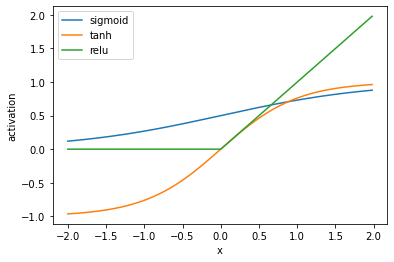

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.02)

sigmoid = 1./(1+np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)), x], axis=0)

plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel('x')
plt.ylabel('activation')
plt.legend(['sigmoid', 'tanh', 'relu'])

plt.show()

In [2]:
import pandas as pd 
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0].shape)
print(type(X_train))

(60000, 28, 28)
(10000, 28, 28)
uint8
(28, 28)
<class 'numpy.ndarray'>


In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

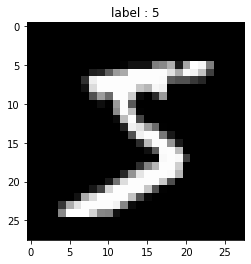

In [5]:
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

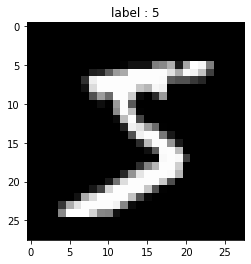

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

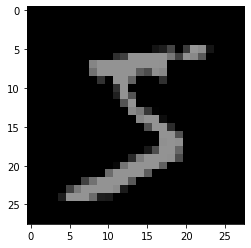

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) 
print(X_train.min())

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) 
print(y_train_one_hot.shape) 
print(y_train_one_hot.dtype) 

(60000,)
(60000, 10)
float64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape) 

(48000, 784)
(12000, 784)


In [11]:
class GetMiniBatch:
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [12]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch))
print(get_mini_batch[5]) 

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([9, 1, 2, 3, 8, 6, 0, 7, 3, 9, 0, 2, 1, 1, 6, 2, 6, 9, 0, 2],
      dtype=uint8))


[Problem 1] Creating a code to determine the initial weight value

In [13]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 
n_output = 10
W1 = sigma * np.random.randn(n_features, n_nodes1)
n_nodes2 = 200
n_nodes3 = 10
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
B1 = sigma * np.random.randn(n_nodes1)
B2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
B3 = sigma * np.random.randn(n_nodes3)
print("W1-->",W1.shape)
print("W2-->",W2.shape)
print("b1-->",B1.shape)
print("b2-->",B2.shape)
print("W3-->",W3.shape)
print("b3-->",B3.shape)

W1--> (784, 400)
W2--> (400, 200)
b1--> (400,)
b2--> (200,)
W3--> (200, 10)
b3--> (10,)


[Problem 2, 3, 4, 5]

In [14]:
class ScratchSimpleNeuralNetrowkClassifier():

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.01 
        self.epoch = 10 
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_test = []
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)
        
        for _ in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=20)
            for mini_X_train, mini_y_train in get_mini_batch:
                self.forward(mini_X_train)
                self.backward(mini_X_train, mini_y_train)
            self.forward(X)
            self.loss_train.append(self.cross_entropy_error(y, self.Z3))
            if X_val is not None:
                self.forward(X_val)
                self.loss_test.append(self.cross_entropy_error(y_val, self.Z3))

        if self.verbose:
            print(self.loss_train)
    
    def forward(self, X):
        self.A1 = X @ self.W1 + self.B1
        self.Z1 = self.tanh_function(self.A1)
        self.A2 = self.Z1 @ self.W2 + self.B2
        self.Z2 = self.sigmoid_function(self.A2)
        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = self.softmax(self.A3)
    
    def backward(self, mini_X, mini_y):
        dA3 = self.Z3 - mini_y
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dB1 = np.sum(dA1, axis=0)
        dW1 = mini_X.T @ dA1
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1
                
    def sigmoid_function(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh_function(self, A):
        return np.tanh(A)
    
    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)

    def cross_entropy_error(self, y, Z):
        L = - np.sum(y * np.log(Z)) / len(y)
        return L
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z3, axis=1)

【Problem 6】Learning and estimation

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = encoder.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = encoder.transform(y_val[:, np.newaxis])

In [16]:
neuralN = ScratchSimpleNeuralNetrowkClassifier()
neuralN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred_train = neuralN.predict(X_train)
pred_test = neuralN.predict(X_val)

【Problem 7】Learning curve plot

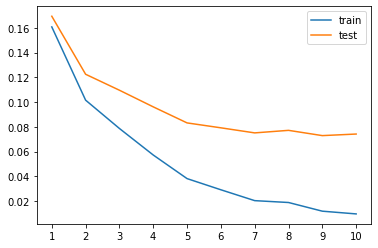

In [17]:
plt.plot(list(range(1, neuralN.epoch+1)), neuralN.loss_train, label='train')
plt.plot(list(range(1, neuralN.epoch+1)), neuralN.loss_test, label='test')
plt.legend()
plt.xticks(list(range(1, neuralN.epoch+1)));

[Problem 8] (Advance assignment) Confirmation of misclassification

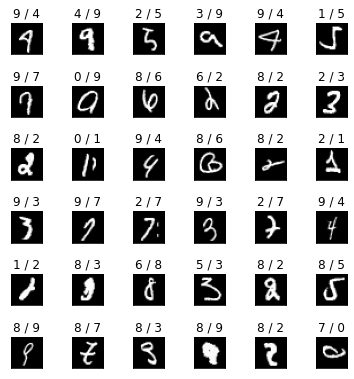

In [18]:
y_pred = pred_test
import numpy as np
import matplotlib.pyplot as plt
num = 36
true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')